Final project - Chapter 5

In [33]:
#installing libraries
!pip install yfinance
!pip install bs4

In [34]:
#importing libraries
import pandas as pd

import yfinance as yf
import requests
from bs4 import BeautifulSoup

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [35]:
def plot_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price ($)", "Historical Revenue ($)"), vertical_spacing = .5)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($ Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=1000, title=stock, xaxis_rangeslider_visible=True)
    fig.show()

1. Extracting Tesla Stock using yfinance

In [36]:
# Using the Ticker function to create a ticker object.
# ticker symbol of tesla is TSLA
tesla_data = yf.Ticker('TSLA')

# history function helps to extract stock information.
# setting period parameter to max to get information for the maximum amount of time.
tesla_data = tesla_data.history(period='max')

# Resetting the index
tesla_data.reset_index(inplace=True)

# display the first five rows
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


2. Extracting Tesla Revenue using webscraping

In [37]:

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data  = requests.get(url).text
soup = BeautifulSoup(html_data,"html5lib")
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):

    if ('Tesla Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')
        
        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

In [38]:

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [39]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [40]:
tesla_revenue.tail()

,Date,Revenue


3. Extracting GME Stock using yfinance

In [ ]:
# Using the Ticker function to create a ticker object.
# ticker symbol of tesla is GME
gme_data = yf.Ticker('GME')

# history function helps to extract stock information.
# setting period parameter to max to get information for the maximum amount of time.
gme_data = gme_data.history(period='max')

# Resetting the index
gme_data.reset_index(inplace=True)

# display the first five rows
gme_data.head()

4. Extracting GME Revenue using webscraping

In [30]:
# using requests library to download the webpage
url='https://www.macrotrends.net/stocks/charts/GME/gme/revenue'

# Save the text of the response
html_text = requests.get(url).text

# Parse the html data using beautiful_soup.
soup=BeautifulSoup(html_text, 'html5lib')

In [31]:
# removing null values
gme_revenue = gme_revenue[gme_revenue['Revenue']!='']
gme_revenue

,Date,Revenue


5. GME stock dashboard

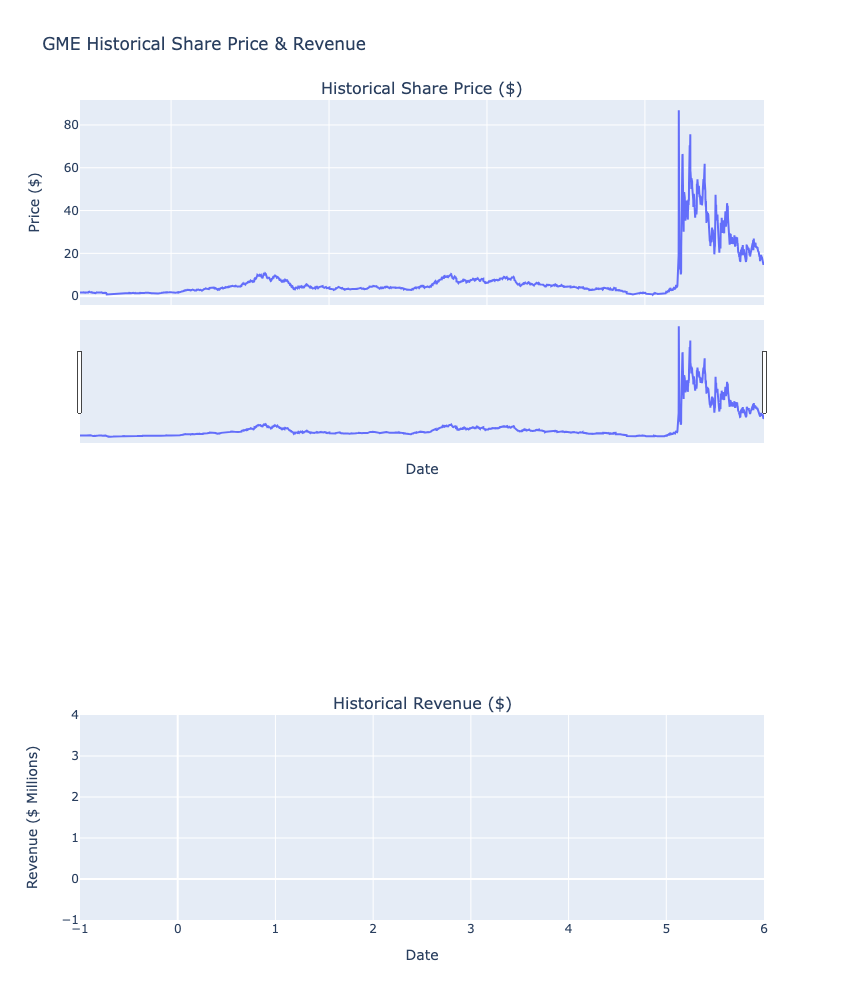

In [32]:
plot_graph(gme_data, gme_revenue, 'GME Historical Share Price & Revenue')

6. GME stock dashboard

In [ ]:
plot_graph(gme_data, gme_revenue, 'GME Historical Share Price & Revenue')